<a href="https://colab.research.google.com/github/gabrielvieiraf/ProjetosPython/blob/master/GoogleColab/MachineLearning/ProcessamentoLinguagemNatural/Linguagem_Natural_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linguagem Natural parte 1:**

# **Introdução a NLP com análise de sentimento**

Base de dados em: https://www.kaggle.com/luisfredgs/imdb-ptbr

# Importando Resenhas do Drive

In [30]:
import pandas as pd

# Permite Importar dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Caminho para dados do arquivo csv 
csv = '/content/drive/My Drive/Colab Notebooks/Alura/imdb.csv'

# Lê arquivo CSV
resenhas = pd.read_csv(csv)

# Padronizando dados
resenhas['sentimentos'] = resenhas.sentiment.map({'neg':0,
                                                  'pos':1})

# Renomeando Coluna
resenhas.rename(columns={'text_pt':'resenha'}, inplace = True)

# Deletando colunas do DataFrame
del resenhas['sentiment'], resenhas['text_en'], resenhas['id']

# Imprime Df
resenhas

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,resenha,sentimentos
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0
...,...,...
49454,"Como a média de votos era muito baixa, e o fat...",1
49455,O enredo teve algumas reviravoltas infelizes e...,1
49456,Estou espantado com a forma como este filme e ...,1
49457,A Christmas Together realmente veio antes do m...,1


# Criando Matriz Esparsa

## Exemplo

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

texto =  ['assisti um filme ótimo','assisti um filme ruim']

vetorizar = CountVectorizer(lowercase = False)

# Criando Mochila de Palavras
bag = vetorizar.fit_transform(texto)

# Matriz esparsa
matriz = pd.DataFrame.sparse.from_spmatrix(bag,
                                           columns= vetorizar.get_feature_names())

matriz

,assisti,filme,ruim,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


## Criando Matriz Esparsa das resenhas

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

vetorizar = CountVectorizer(lowercase = False,
                            max_features = 50)

# Criando Mochila de Palavras
bag = vetorizar.fit_transform(resenhas.resenha)


# Separando treino e teste

In [66]:
# Atribuindo valor aos eixos

# Classificar os textos
x = bag

# labels, classes de treino
y = resenhas[['sentimentos']]

from sklearn.model_selection import train_test_split

SEED = 42

treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                         random_state=SEED,
                                                         test_size=0.25,
                                                         stratify = y)

# Printa elementos do treino e teste
print('Treinaremos com', treino_x.shape[0],
      'elementos e testaremos com', teste_x.shape[0], 'elementos.')

Treinaremos com 37094 elementos e testaremos com 12365 elementos.


# Regressão e Treino

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Ignorar warnings 
import warnings
warnings.filterwarnings("ignore")

# Regressão Logistica
regressao = LogisticRegression()

# Ensinando para máquina
regressao.fit(treino_x,treino_y)

# Criando previsão
previsoes = regressao.predict(teste_x)
previsoes.shape[0]

# Método 02 para taxa de acerto
taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

# Imprime acerto
print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

O acerto foi de: 65.07 %


# Criando Função para classificar Sentimentos

In [87]:
def classifica(texto, coluna_texto, coluna_sentimento):

  vetorizar = CountVectorizer(lowercase = False,
                              max_features = 50)

  # Criando Mochila de Palavras
  bag = vetorizar.fit_transform(texto[coluna_texto])

  # Classificar os textos
  x = bag

  # labels, classes de treino
  y = texto[coluna_sentimento]

  # Semente para random state
  SEED = 42

  treino_x, teste_x, treino_y, teste_y = train_test_split (x, y,
                                                          random_state=SEED,
                                                          test_size=0.25,
                                                          stratify = y)

  # Printa elementos do treino e teste
  print('Treinaremos com', treino_x.shape[0],
        'elementos e testaremos com', teste_x.shape[0], 'elementos.')
  
  # Regressão Logistica
  regressao = LogisticRegression()

  # Ensinando para máquina
  regressao.fit(treino_x,treino_y)

  # Criando previsão
  previsoes = regressao.predict(teste_x)
  previsoes.shape[0]

  # Método 02 para taxa de acerto
  taxa_de_acerto = accuracy_score(teste_y, previsoes)*100

  # Imprime acerto
  print("O acerto foi de: %.2f" % taxa_de_acerto,'%' )

classifica(resenhas, 'resenha', 'sentimentos')

Treinaremos com 37094 elementos e testaremos com 12365 elementos.
O acerto foi de: 65.07 %


# Nuvem de palavras

In [105]:
from wordcloud import WordCloud

# Entrada da Nuvem é uma variável com todas as palavras
# Aqui utilizaremos list comprehensions

palavras = ' '.join([texto for texto in resenhas.resenha])

nuvem = WordCloud( width=800, height= 500,
                  max_font_size= 120,
                  collocations = False).generate(palavras)
                  
# Collocation = False retira bigramas

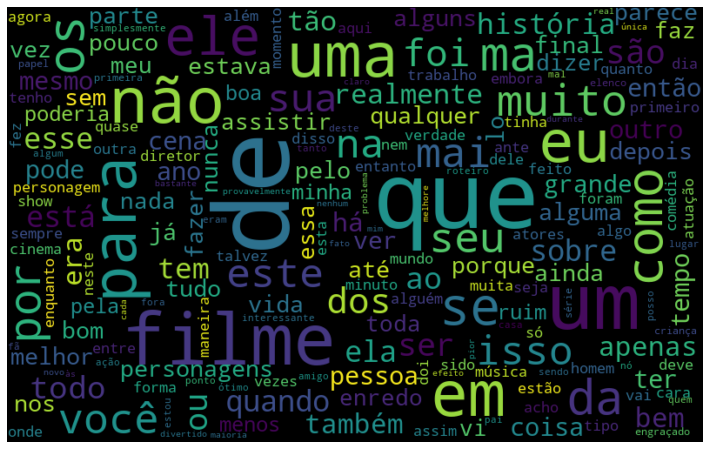

In [106]:
import matplotlib.pyplot as plt

# Tamanho da imagem
plt.figure(figsize= (15,8))

# Seta imagem
plt.imshow(nuvem, interpolation= 'bilinear')

# 'desliga' eixos da imagem
plt.axis('off')

# Mostra imagem
plt.show()

### Criando Função para Gerar a visualização da Nuvem de palavras

Nuvem Positiva


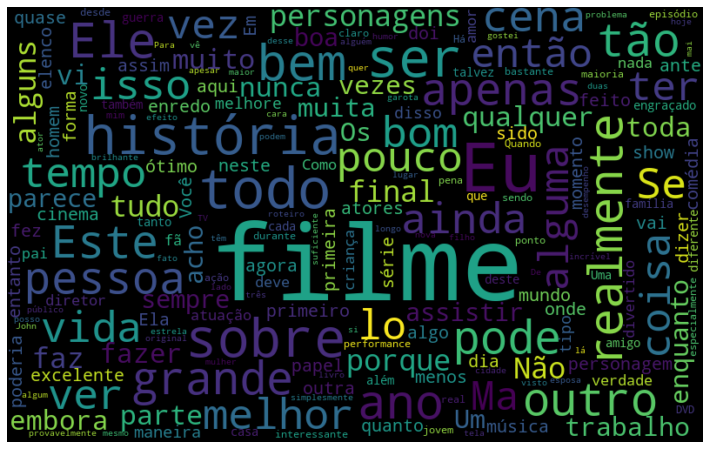





Nuvem Negativa


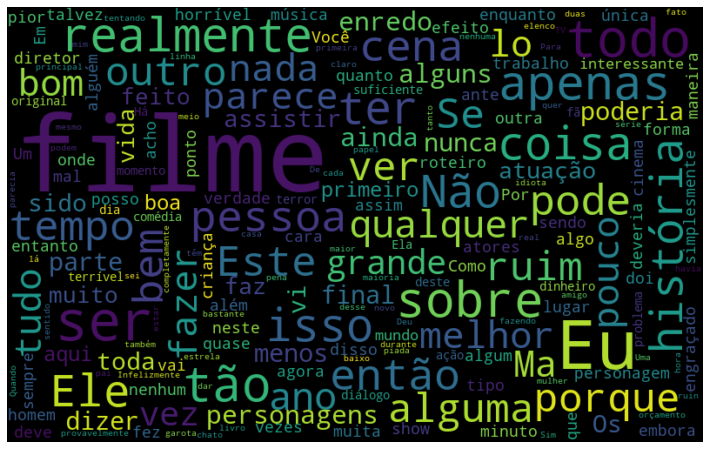

In [186]:
def criaNuvem(texto, coluna_texto, sentimentos):
  texto_query = texto.query(' %s == %s ' %(coluna_texto, sentimentos))
  # Entrada da Nuvem é uma variável com todas as palavras
  # Aqui utilizaremos list comprehensions
  # Inicialmente fazíamos a query em 'resenha', porém após o tratamento, 
  # Agora fazemos em 'Tratamento_01'
  palavras = ' '.join([texto for texto in texto_query.Tratamento_01])

  nuvem = WordCloud( width=800, height= 500,
                    max_font_size= 120,
                    collocations = False).generate(palavras)
                    
  # Collocation = False retira bigramas
  # Tamanho da imagem
  plt.figure(figsize= (15,8))

  # Seta imagem
  plt.imshow(nuvem, interpolation= 'bilinear')

  # 'desliga' eixos da imagem
  plt.axis('off')

  # Mostra imagem
  plt.show()

# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem(resenhas, 'sentimentos', 0)

# Conhecendo a biblioteca NLTK

In [117]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

## Exemplo 

In [118]:
frase = ['um filme bom', 'um filme ruim']
frequencia = nltk.FreqDist(frase)
frequencia

FreqDist({'um filme bom': 1, 'um filme ruim': 1})

## Tokenização

In [120]:
from nltk import tokenize

frase = 'Processamento de Linguagem Natural é Demais!'

# Crando Token separado por espaço em branco
token_espaco = tokenize.WhitespaceTokenizer()

token_frase = token_espaco.tokenize(frase)

print(token_frase)

['Processamento', 'de', 'Linguagem', 'Natural', 'é', 'Demais!']


# Aplicando Tokenização e frequência de palavras ao dataset

In [123]:
# Crando Token separado por espaço em branco
token_espaco = tokenize.WhitespaceTokenizer()

# obs : Definição de 'palavras' está no tópico 'Nuvem de Palavras'
token_frase = token_espaco.tokenize(palavras)

# Vendo frequência de palavras
frequencia = nltk.FreqDist(token_frase)

## Criando Dataframe com a Frequência de palavras

In [160]:
df_palavras = pd.DataFrame({'Palavra': list(frequencia.keys()),
              'Frequência': list(frequencia.values())})
df_palavras

,Palavra,Frequência
0,Mais,1538
1,uma,130888
2,"vez,",1927
3,o,244881
4,Sr.,1741
...,...,...
348280,"Muppified,",1
348281,inventora,1
348282,"""Union",1
348283,beirar,1


## Criando Gráfico de Pareto

17


<function matplotlib.pyplot.show>

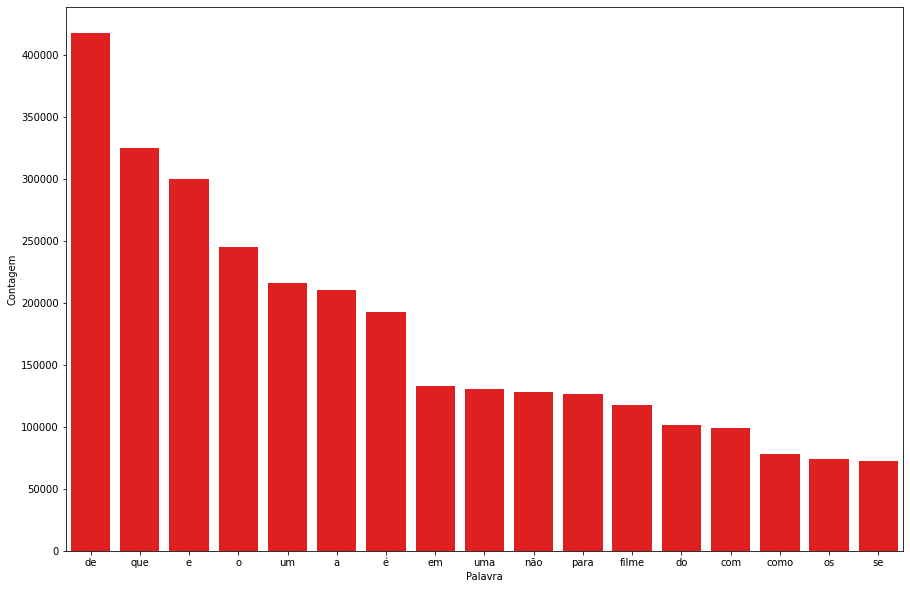

In [161]:
import seaborn as sns

plt.figure(figsize=(15,10))

# 20% das maiores frequências
pareto = int(0.00005* len(df_palavras))
print(pareto)


df_palavras = df_palavras.nlargest( columns= 'Frequência', n = pareto)

ax = sns.barplot(data = df_palavras,
                 x="Palavra", y="Frequência",
                 color='red')

ax.set(ylabel = 'Contagem')

plt.show

## Criando Função para gráfico de Pareto



In [191]:
def pareto(texto, coluna_texto, quantidade):
  palavras = ' '.join([texto for texto in texto[coluna_texto]])

  token_frase = token_espaco.tokenize(palavras)

  # Vendo frequência de palavras
  frequencia = nltk.FreqDist(token_frase)

  df_palavras = pd.DataFrame({'Palavra': list(frequencia.keys()),
              'Frequência': list(frequencia.values())})
  
  # Criando Gráfico
  plt.figure(figsize=(20,10))

  df_palavras = df_palavras.nlargest( columns= 'Frequência', n = quantidade)

  ax = sns.barplot(data = df_palavras,
                  x="Palavra", y="Frequência",
                  color='red')

  ax.set(ylabel = 'Contagem')

  plt.show

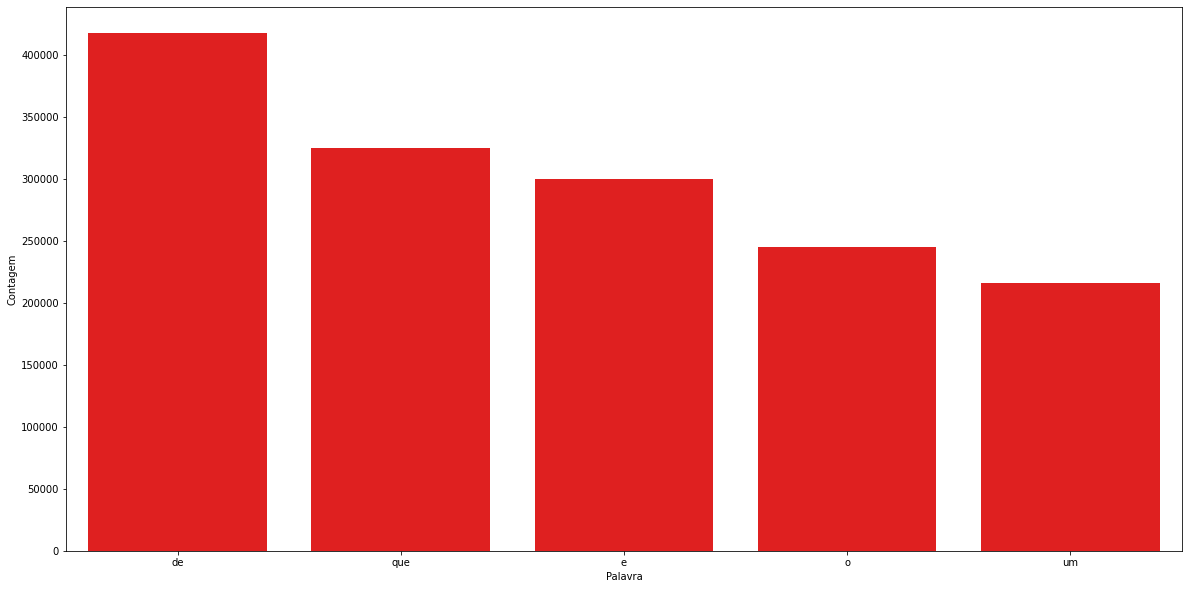

In [192]:
pareto(resenhas, 'resenha', 5)

# Stop Words - removendo o que não agrega

In [164]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
print(palavras_irrelevantes)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [177]:
frase_processada = list()
for opiniao in resenhas['resenha']:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append( ' '.join(nova_frase))

resenhas['Tratamento_01'] = frase_processada
resenhas.head(5)

,resenha,sentimentos,Tratamento_01
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,Este é um exemplo do motivo pelo qual a maiori...,0,Este exemplo motivo maioria filmes ação mesmos...
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,Nem mesmo os Beatles puderam escrever músicas ...,0,Nem Beatles puderam escrever músicas todos gos...
4,Filmes de fotos de latão não é uma palavra apr...,0,"Filmes fotos latão palavra apropriada eles, ve..."


## Criando uma nova Nuvem de palavras

Nuvem Positiva


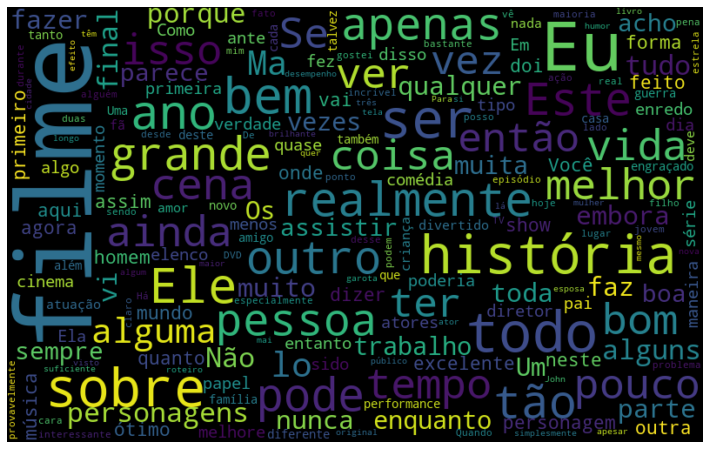





Nuvem Negativa


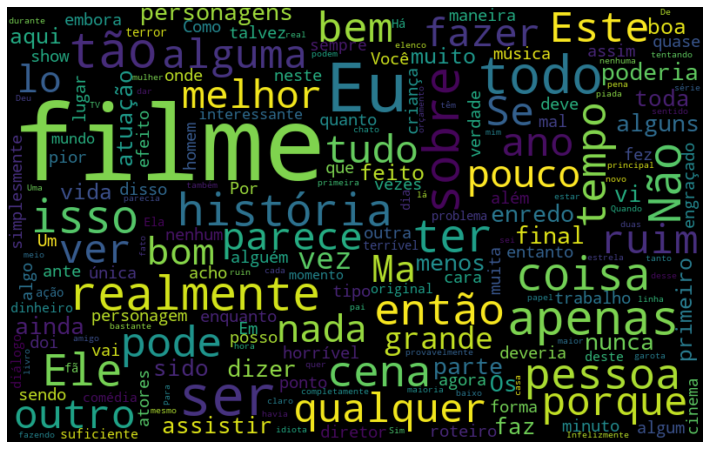

In [187]:
# Nuvem Positiva
print("Nuvem Positiva")
criaNuvem(resenhas, 'sentimentos', 1)

print('\n\n\n')

# Nuvem Negativa
print('Nuvem Negativa')
criaNuvem(resenhas, 'sentimentos', 0)

## Criando pareto de tratamento 01

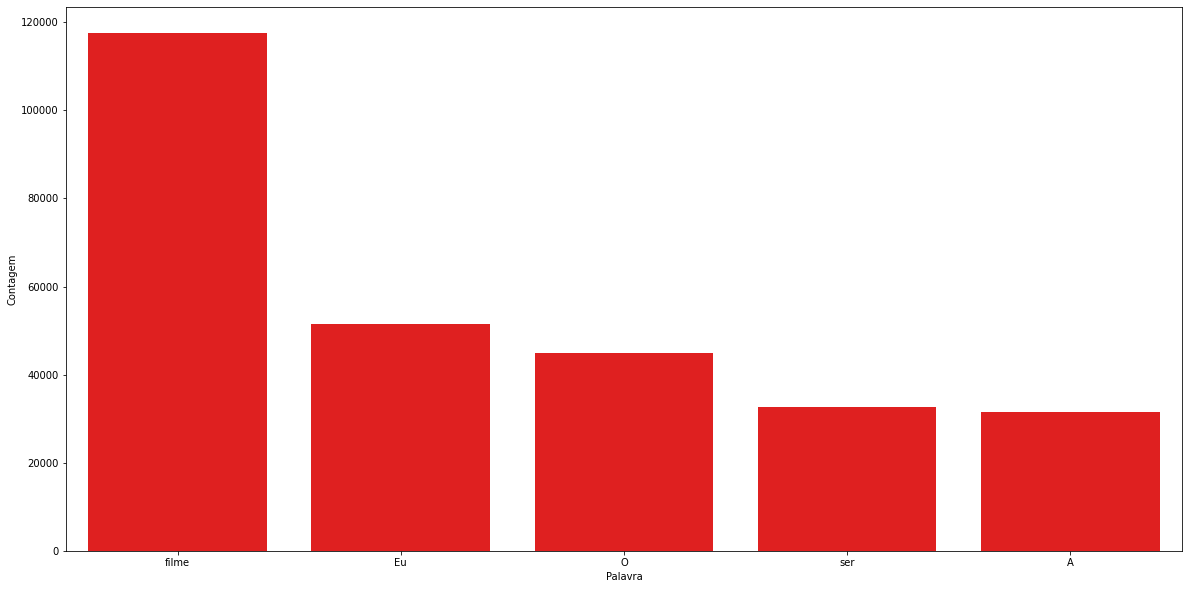

In [194]:
pareto(resenhas, 'Tratamento_01', 5)